In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
theta_mu = 1.0
theta_sigma = 2.0

In [44]:
def pi(theta_mu, theta_sigma):
    return np.random.normal(loc=theta_mu, scale=theta_sigma)

In [45]:
def x_mu(state):
    return 1.0

In [46]:
def x_sigma(state):
    return 1.0

In [47]:
def grad_ln_theta_mu(state, action, theta_mu, theta_sigma):
    return (1 / theta_sigma) * (action - theta_mu) * x_mu(state)  # Ex. 13.4

In [48]:
def grad_ln_theta_sigma(state, action, theta_mu, theta_sigma):
    return (((action - theta_mu) / theta_sigma) - 1) * x_sigma(state)

In [49]:
grad_ln_theta_mu(None, -2.0, theta_mu, theta_sigma)

-1.5

In [50]:
grad_ln_theta_sigma(None, -2.0, theta_mu, theta_sigma)

-2.5

In [51]:
aa = np.linspace(-3, 3)
mm = grad_ln_theta_mu(None, aa, theta_mu, theta_sigma)
ss = grad_ln_theta_sigma(None, aa, theta_mu, theta_sigma)

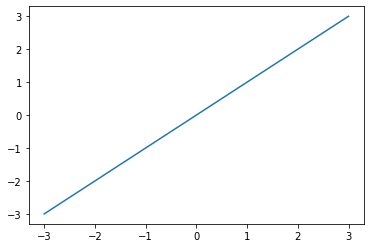

In [52]:
plt.plot(aa, gg)

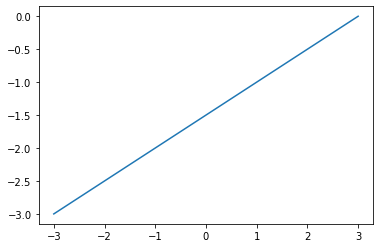

In [53]:
plt.plot(aa, ss)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def softmax(x):
    """Numerically stable softmax"""
    ex = np.exp(x - np.max(x))
    return ex / np.sum(ex)

In [4]:
nb_states = 1
nb_actions = 10

In [5]:
_theta = np.zeros((nb_states, nb_actions))

In [6]:
def pi_np(state):
    """Return policy, i.e. probability distribution over actions."""
    # Change 1:
    h_vec = _theta[state]
    prob_vec = softmax(h_vec)                     # shape=[n_act], e.q. 13.2
    return prob_vec

In [7]:
def grad_np(state, action):
    x_s = np.zeros(nb_actions)
    x_s[action] = 1             # feature vector, one-hot
    prob = pi_np(state)
    grad_s = x_s - prob
    return grad_s

In [8]:
pi_np(0)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [9]:
grad_np(0, 0)

array([ 0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1])

In [10]:
import torch

In [11]:
_theta_t = torch.zeros((nb_states, nb_actions), requires_grad=True)

In [16]:
def pi_t(state):
    """Return policy, i.e. probability distribution over actions."""
    with torch.no_grad():
        prob_t = torch.softmax(_theta_t[state], dim=-1)
        return prob_t.numpy()

In [26]:
def grad_t(state, action):
    _theta_t.grad.data.zero_()
    prob_t = torch.softmax(_theta_t[state], dim=-1)
    log_t = torch.log(prob_t)
    loss = log_t[action]  # -1 grad ascent, scale by R
    loss.backward()

In [27]:
pi_t(0)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], dtype=float32)

In [28]:
grad_t(0, 0)

In [29]:
_theta_t.grad

tensor([[ 0.9000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000,
         -0.1000, -0.1000]])

In [32]:
_theta_mu_t = torch.zeros(nb_states, requires_grad=True)
_theta_sigma_t = torch.zeros(nb_states, requires_grad=True)

### Gaussian - math

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [3]:
X_math_np = np.linspace(-5, 5)
Y_math_np = np.array([normpdf(x, mean=0.0, sd=1.0) for x in X_math_np])

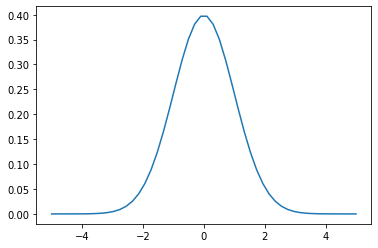

In [4]:
plt.plot(X_math_np, Y_math_np)
plt.show()

### Gaussian - numpy

In [5]:
def gaussian_np(x, mean, std):
    var = std**2
    denom = (2*math.pi*var)**.5
    num = np.exp(-(x-mean)**2/(2*var))
    return num/denom

In [6]:
X_np = np.linspace(-5, 5)
Y_np = gaussian_np(X_np, mean=0.0, std=1.0)

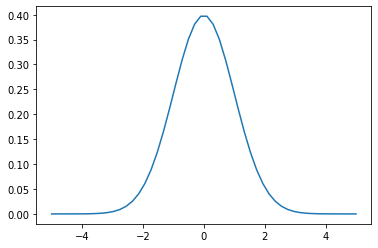

In [7]:
plt.plot(X_np, Y_np)
plt.show()

### Gaussian - torch

In [17]:
import torch

In [18]:
def gaussian_t(x_t, mean, std):
    var = std**2
    denom = (2*math.pi*var)**.5
    num = torch.exp( -(x_t-mean)**2 / (2*var) )
    return num / denom

In [19]:
X_t = torch.linspace(-5, 5)

In [20]:
Y_t = gaussian_t(X_t, mean=0.0, std=1.0)

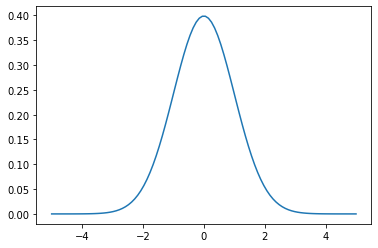

In [21]:
plt.plot(X_t.numpy(), Y_t.numpy())